## Preamble

### <a id='Title'></a>
# <center> PCA Problem Class
_____

<center>
    Notebook by:
    <br>
    Carlos del-Castillo-Negrete (<font color='blue'>cdelcastillo21@gmail.com</font>)
</center>

The purpose of this notebook is to demonstrate usage of the `WMEProblem` and `PCAProblem` classes for solving parameter estimation problems.

# <a id='Title'></a> Problem Set-Up - Data-Consistent Update

TODO: Update

$\Large \pi_{up}(\lambda) = \pi_{in}(\lambda)\frac{\pi_{ob}(Q(\lambda))}{\pi_{pred}(Q(\lambda))}$

Note:

* $\pi_{in}$ represents initial descripton of aleatoric, or irreducible, uncertainty on $\Lambda$.

* Data-Consistent comes from Disintegration theorem and Bayes rule [ref].


## Example 1 - Low Dimensional Example
---

We start with a simple QoI map over a one-dimensional parameter space:
   
   $$ \Large \Lambda = [-1, 1] \in \mathbb{R} $$  
   
   $$ \Large Q(\lambda) = \lambda^5 \rightarrow \mathcal{D} = [-1, 1] $$

We assume:

   $\pi_{in} \sim \mathcal{U}([-1, 1])$
  
   $\pi_{ob} \sim \mathcal{N}(0.25,0.1^2)$

### Data

We take $N$ samples from an initial uniform distribution over the input parameter space. These samples will be pushed forward through our QoI map to constrcut the predicted density $\pi_{pred}$:

In [10]:
from pydci import Model
from pydci.log import enable_log, disable_log
import importlib
import pdb
import numpy as np

importlib.reload(Model)

disable_log()
enable_log()


class Monomial(Model.DynamicModel):
    def __init__(
        self,
        p,
        x0=[0, 0],  # Note in the constant monomial case, initial state won't matter
        lam_true=[0.75],
        solve_ts=1.0,
        sample_ts=1.1,
        measurement_noise=0.1,
        **kwargs
    ):
        self.p = p
        super().__init__(
            x0,
            lam_true,
            solve_ts=solve_ts,
            sample_ts=sample_ts,
            measurement_noise=measurement_noise,
            **kwargs
        )

    def forward_model(
        self,
        x0,
        times,
        lam,
    ):
        """
        Monomial Forward Model
        """
        return np.array([[lam[0] ** self.p]])


class Monomial2D(Model.DynamicModel):
    def __init__(
        self,
        p,
        x0=[0, 0],  # Note in the constant monomial case, initial state won't matter
        lam_true=[0.75, 0.25],
        solve_ts=1.0,
        sample_ts=1.1,
        measurement_noise=0.1,
        **kwargs
    ):
        self.p = p
        super().__init__(
            x0,
            lam_true,
            solve_ts=solve_ts,
            sample_ts=sample_ts,
            measurement_noise=measurement_noise,
            **kwargs
        )

    def forward_model(
        self,
        x0,
        times,
        lam,
    ):
        """
        Monomial Forward Model
        """
        return np.array([[lam[0] ** self.p, lam[1] ** self.p]])


mm = Monomial(5)
lam = mm.get_uniform_initial_samples(num_samples=100, scale=0.5)
args = mm.forward_solve(2.0, samples=lam)
# args

[04/10/23 22:43:37] INFO     Logger initialized                                                           ]8;id=541555;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=635720;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    INFO     Drawing 100 from uniform at:                                              ]8;id=108989;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=580174;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#234\234]8;;\
                                     loc: [0.375]                                                                  
                                     scale: [0.75]                                                                 

Solving model sample set: |████████████████████| 100/100 [100%] in 0.0s (51905.1


# PCA Map

In [11]:
from pydci import ConsistentBayes as CB
import importlib

importlib.reload(CB)
pca_prob = CB.PCAMUDProblem(lam, args["q_lam"], args["data"], args["std_dev"])
pca_prob.solve()

[04/10/23 22:43:39] INFO     Solving using 1 components                                     ]8;id=446107;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=989119;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1043\1043]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                       ]8;id=838429;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=593249;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#185\185]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=359602;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=460142;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=626708;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=699948;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

In [12]:
pca_prob.result

,e_r,kl,lam_MUD_0,predict_delta,within_thresh,closest,max_kl,min_kl
nc,,,,,,,,
1,0.727823,1.844421,0.792085,0.272177,True,True,True,True


In [13]:
pca_prob.pca_result

,e_r,kl,lam_MUD_0,predict_delta,within_thresh,closest,max_kl,min_kl
nc,,,,,,,,
1,0.727823,1.844421,0.792085,0.272177,True,True,True,True


In [14]:
pca_prob.state

,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,lam_0,q_lam_0,q_lam_1,q_lam_2,q_lam_3,q_pca_0,pi_obs_nc=1,pi_pr_nc=1,ratio_nc=1,pi_up_nc=1
0,1.0,1.070940,0.050591,1.695592e-07,3.351553e-06,3.589310e-06,0.450500,0.018556,0.018556,0.018556,0.018556,-5.416849,1.695592e-07,0.050591,3.351553e-06,3.589310e-06
1,1.0,1.421526,0.054387,5.710087e-05,1.049890e-03,1.492446e-03,0.601932,0.079020,0.079020,0.079020,0.079020,-4.207553,5.710087e-05,0.054387,1.049890e-03,1.492446e-03
2,1.0,1.058193,0.050544,1.601423e-07,3.168390e-06,3.352769e-06,0.447912,0.018029,0.018029,0.018029,0.018029,-5.427387,1.601423e-07,0.050544,3.168390e-06,3.352769e-06
3,1.0,1.302874,0.025485,3.054503e-07,1.198572e-05,1.561588e-05,0.888832,0.554752,0.554752,0.554752,0.554752,5.307078,3.054503e-07,0.025485,1.198572e-05,1.561588e-05
4,1.0,1.281458,0.018068,1.868341e-20,1.034074e-18,1.325123e-18,0.946875,0.761138,0.761138,0.761138,0.761138,9.434799,1.868341e-20,0.018068,1.034074e-18,1.325123e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.302865,0.025488,3.084055e-07,1.209990e-05,1.576454e-05,0.888803,0.554661,0.554661,0.554661,0.554661,5.305264,3.084055e-07,0.025488,1.209990e-05,1.576454e-05
96,1.0,1.229721,0.012138,4.039876e-36,3.328168e-34,4.092717e-34,0.984344,0.924134,0.924134,0.924134,0.924134,12.694716,4.039876e-36,0.012138,3.328168e-34,4.092717e-34
97,1.0,1.043804,0.012289,3.025178e-93,2.461680e-91,2.569511e-91,1.056975,1.319239,1.319239,1.319239,1.319239,20.596820,3.025178e-93,0.012289,2.461680e-91,2.569511e-91
98,1.0,1.364306,0.054260,1.139849e-02,2.100735e-01,2.866046e-01,0.689705,0.156069,0.156069,0.156069,0.156069,-2.666584,1.139849e-02,0.054260,2.100735e-01,2.866046e-01


<Axes: xlabel='q_pca_0', ylabel='q_pca_1'>

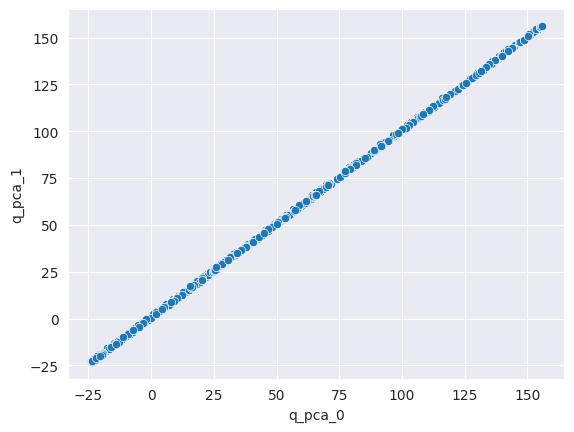

In [46]:
import seaborn as sns

sns.scatterplot(data=pca_prob.state, x="q_pca_0", y="q_pca_1")

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

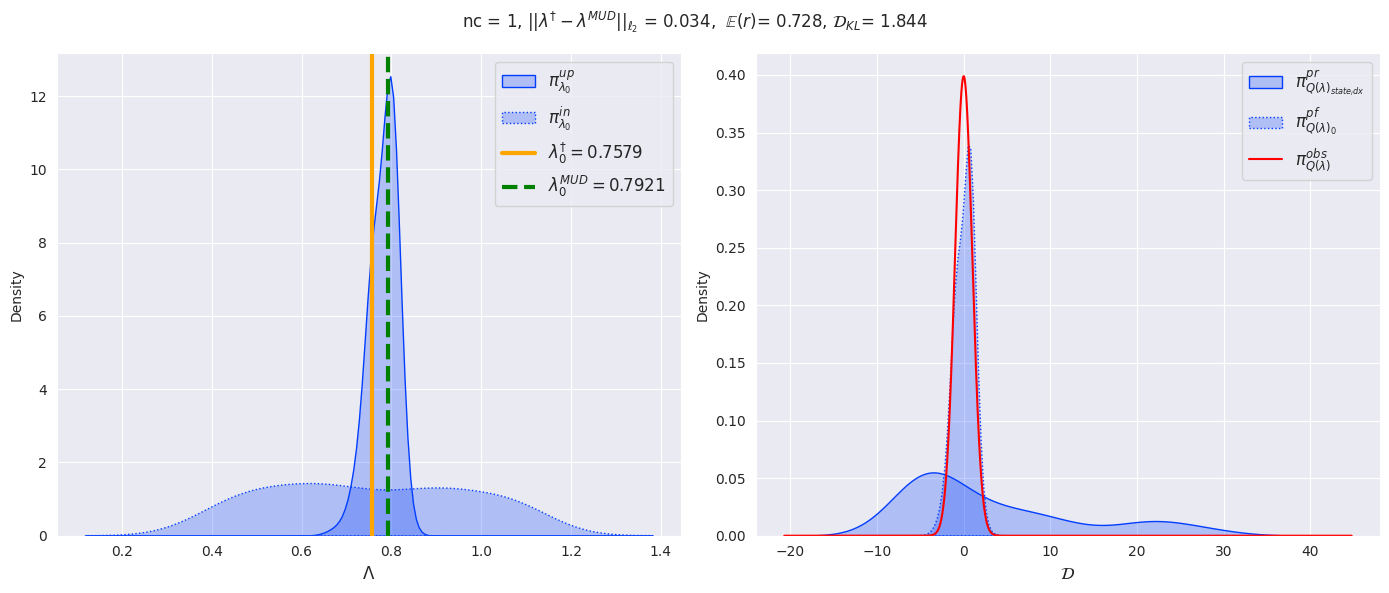

In [15]:
pca_prob.density_plots(lam_kwargs={"lam_true": [[0.25**0.2]]})

## Aggregating More Data

Lets increase the number of data points we use.
We can see how with the $Q_{PCA}$ map we reduce the variance in the MUD estimate as more datapoints are used in the map.

In [16]:
N_vals = [1, 10, 100]

fig, ax = plt.subplots(len(N_vals), 2, figsize=(10, 5*len(N_vals)))
for i, N in enumerate(N_vals):
    qq_lam = (lam**p).reshape(num_samples, -1)
data = np.array([0.25])
    pca_prob = PCAMUDProblem.PCAMUDProblem(lam, q_lam, data, sigma)
    pca_prob.solve()
    _ = pca_prob.plot_param_state(true_vals=[[0.25**0.2]], ax=ax[i][0])
    _ = pca_prob.plot_obs_state(ax=ax[i][1])
    print(pca_prob.result)

IndentationError: unexpected indent (1336217209.py, line 7)

## Masking data used

Can use the mask argument to control what data we use in aggregating for the p

In [26]:
# Number of samples to use, and assumed observed normal distribution parameters
p, num_samples, mu, sigma, domain = 5, int(1e3), 0.25, 0.1, [-1, 1]
lam, q_lam, data = monomial(
    p=p, num_samples=num_samples, domain=domain, mu=mu, sigma=sigma, N=100
)
lam.shape, q_lam.shape, data.shape

((1000, 1), (1000, 100), (100,))

[04/07/23 00:50:13] INFO     Adding q_lam of size 100 to dataframe                                     ]8;id=758305;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=425554;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam of size 1 to dataframe                                         ]8;id=544796;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=285802;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding q_pca of size 1 to dataframe                                       ]8;id=844584;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=208876;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=697358;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=182516;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=419214;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=377563;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

        e_r        kl  lam_MUD_0
0  0.914972  4.807961    0.76292


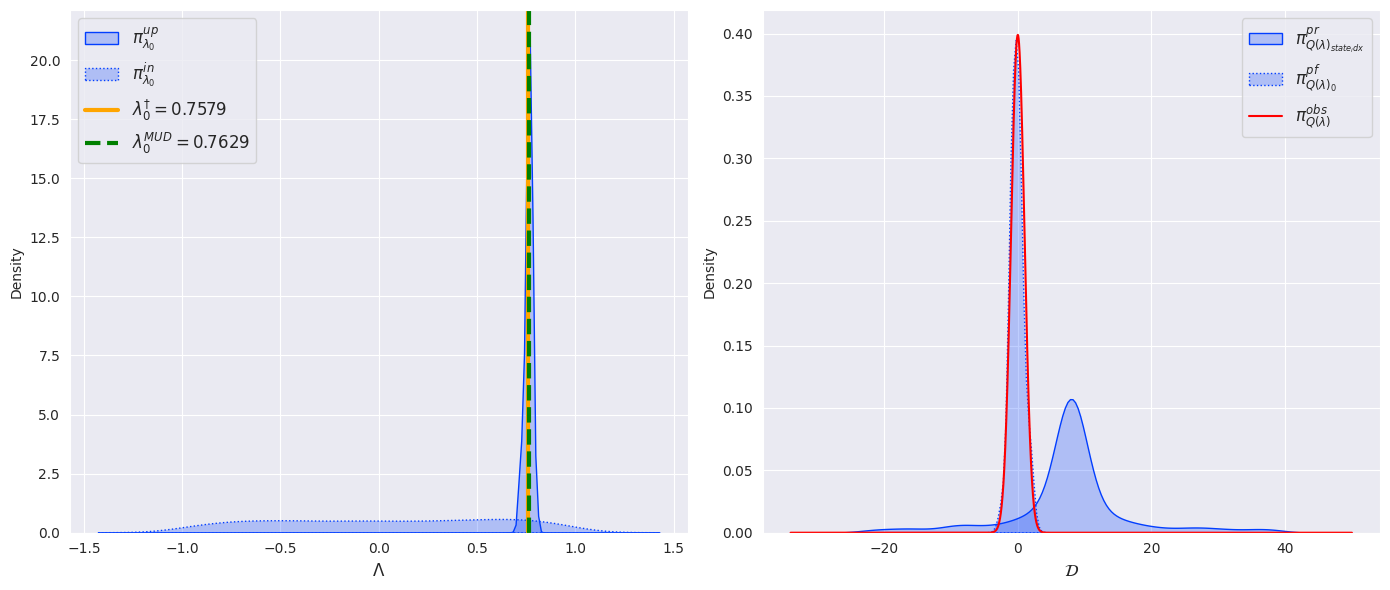

In [28]:
pca_prob = PCAMUDProblem.PCAMUDProblem(lam, q_lam, data, sigma)
pca_prob.pca_mask = range(10)
pca_prob.solve()
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
_, _ = pca_prob.plot_param_state(
    ax=axs[0], true_vals=[[0.25**0.2]]
), pca_prob.plot_obs_state(ax=axs[1])
print(pca_prob.result)

# Appendix: WME Map

The $Q_{WME}$ is a pre-cursor to the $Q_{PCA}$ map. 

TODO: More

In [ ]:
# Construct density problem object using lambda samples and QoI Values
# Note by default DensityProblem class assumes uniform distribution over domain if nothing specified
# The predicted distribution will be determined from a Gaussian Kernel Density Estimate over predicted values
# Have to set observed distribution -> assuming known sample mean, 0.25, and std dev, 0.1, from observed data.
importlib.reload(WMEMUDProblem)
wme_prob = WMEMUDProblem.WMEMUDProblem(lam, q_lam, data, sigma)
wme_prob.solve()

In [ ]:
wme_prob.result

,e_r,kl,lam_MUD_0
0,0.230464,0.489307,0.999503


In [ ]:
wme_prob.state

,lam_0,q_lam_0,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,q_wme_0
0,-0.746060,-0.231137,1.0,0.453013,1.284658,0.394351,0.306970,0.139061,0.152149
1,0.933436,0.708634,1.0,0.370229,0.548637,0.394768,0.719544,0.266396,-0.145033
2,-0.479048,-0.025229,1.0,0.535527,10.061247,0.397434,0.039501,0.021154,0.087035
3,0.794473,0.316516,1.0,0.454461,0.782185,0.398854,0.509923,0.231740,-0.021034
4,-0.246501,-0.000910,1.0,0.514298,10.515017,0.397688,0.037821,0.019451,0.079345
...,...,...,...,...,...,...,...,...,...
995,0.432104,0.015064,1.0,0.488401,10.323894,0.397843,0.038536,0.018821,0.074293
996,0.379948,0.007918,1.0,0.499770,10.457360,0.397775,0.038038,0.019010,0.076553
997,-0.420394,-0.013130,1.0,0.541642,10.396515,0.397564,0.038240,0.020712,0.083209
998,-0.429739,-0.014656,1.0,0.541358,10.365825,0.397548,0.038352,0.020762,0.083692


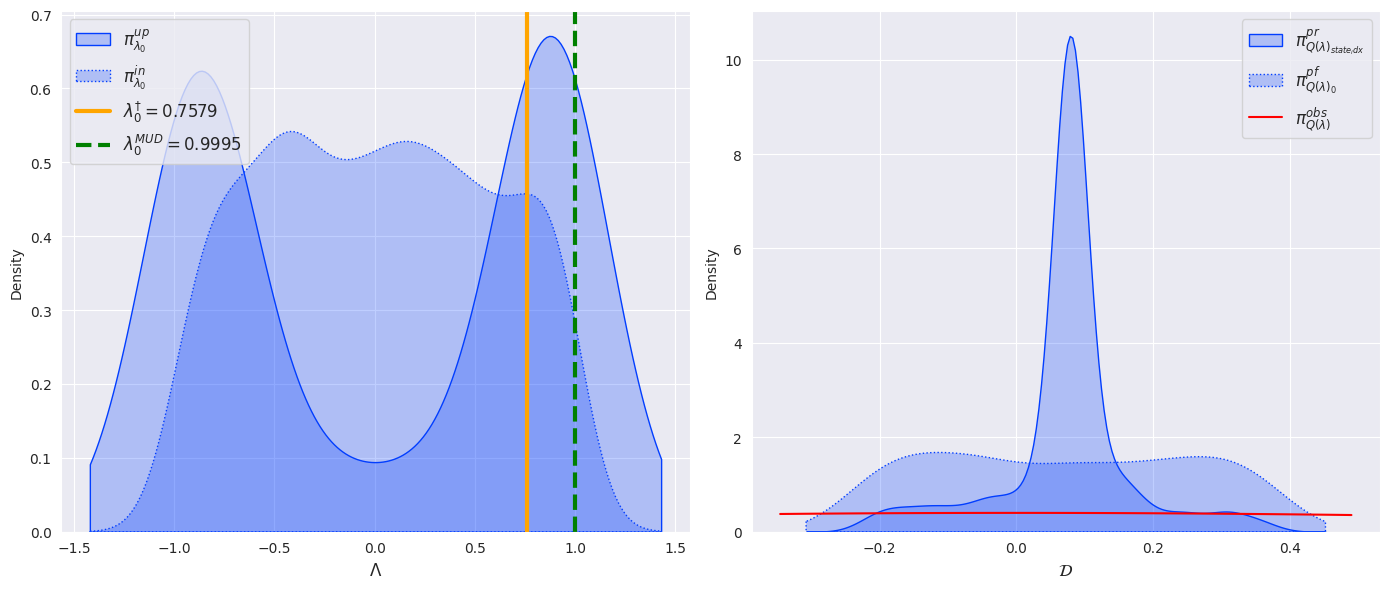

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
_, _ = wme_prob.plot_param_state(
    ax=axs[0], true_vals=[[0.25**0.2]]
), wme_prob.plot_obs_state(ax=axs[1])

## Aggregating More Data

Lets increase the number of data points we use.
We can see how with the $Q_{WME}$ map we reduce the variance in the MUD estimate as more datapoints are used in the map.

        e_r        kl  lam_MUD_0
0  0.235081  0.489879   0.995044
        e_r        kl  lam_MUD_0
0  0.888939  0.288629   0.851996
        e_r        kl  lam_MUD_0
0  0.693604  4.966406   0.759928


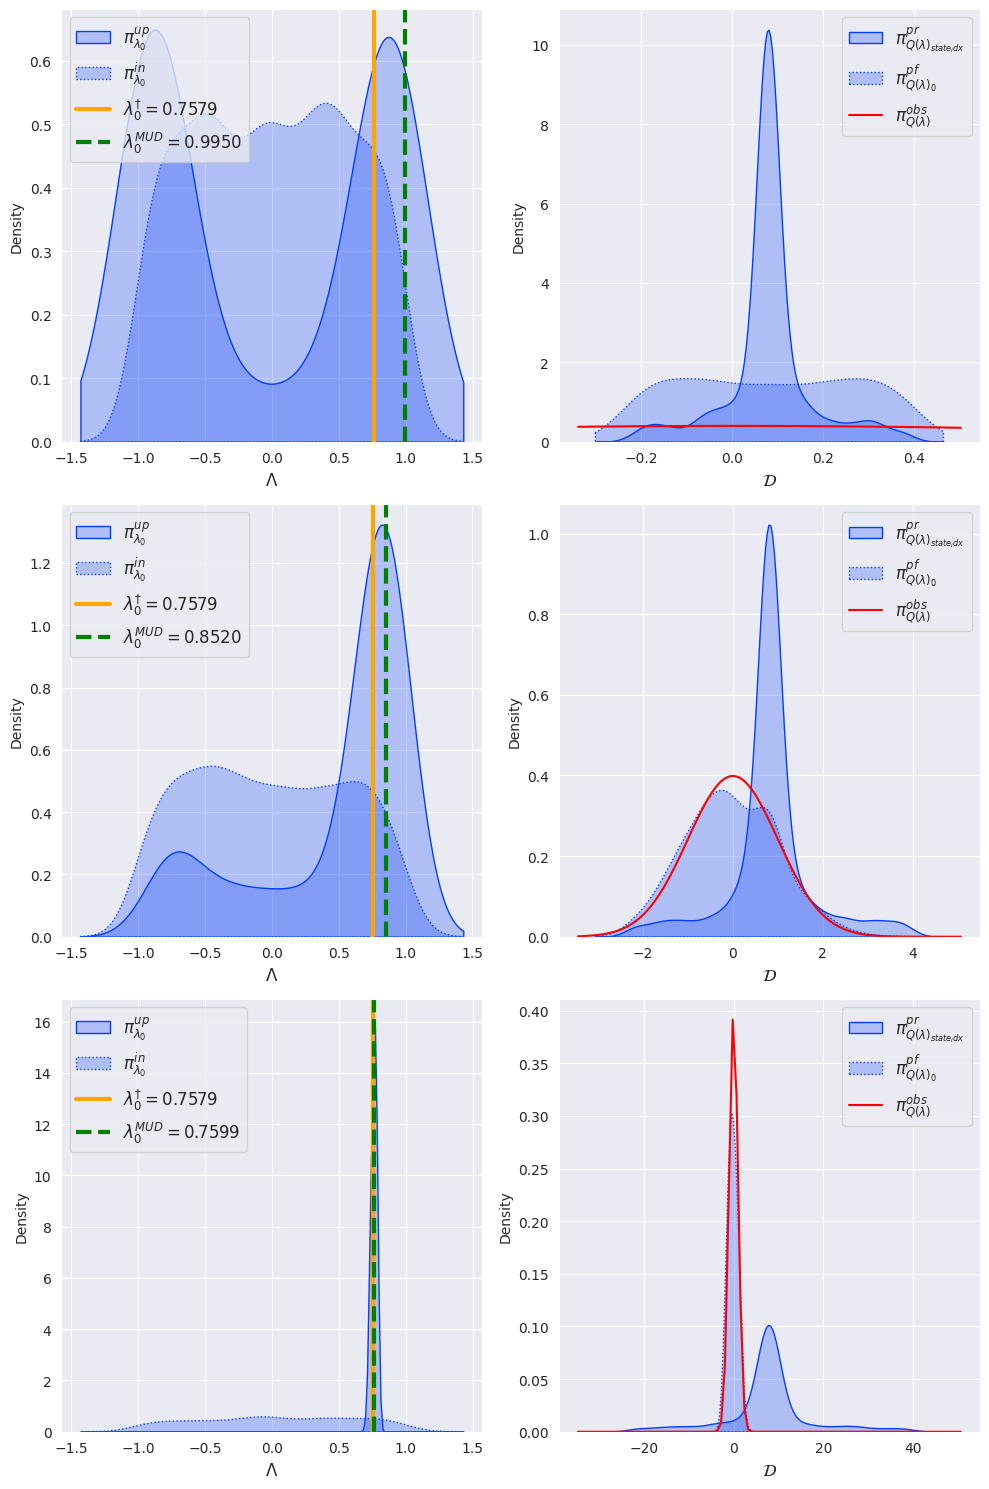

In [ ]:
N_vals = [1, 10, 100]

fig, ax = plt.subplots(len(N_vals), 2, figsize=(10, 5 * len(N_vals)))

for i, N in enumerate(N_vals):
    lam, q_lam, data = monomial(
        p=p, num_samples=num_samples, domain=domain, mu=mu, sigma=sigma, N=N
    )
    wme_prob = WMEMUDProblem.WMEMUDProblem(lam, q_lam, data, sigma)
    wme_prob.solve()
    _ = wme_prob.plot_param_state(true_vals=[[0.25**0.2]], ax=ax[i][0])
    _ = wme_prob.plot_obs_state(ax=ax[i][1])
    print(wme_prob.result)

## 2D Problem

In [89]:
class Monomial2D(Model.DynamicModel):
    def __init__(
        self,
        p,
        x0=[0, 0],  # Note in the constant monomial case, initial state won't matter
        lam_true=[0.5, 0.5],
        solve_ts=1.0,
        sample_ts=1.1,
        measurement_noise=0.01,
        **kwargs
    ):
        self.p = p
        super().__init__(
            x0,
            lam_true,
            solve_ts=solve_ts,
            sample_ts=sample_ts,
            measurement_noise=measurement_noise,
            **kwargs
        )

    def forward_model(
        self,
        x0,
        times,
        lam,
    ):
        """
        Monomial Forward Model
        """
        return np.array([[lam[0] ** self.p, lam[1] ** self.p]])


mm2 = Monomial2D(5)
lam = mm2.get_uniform_initial_samples(num_samples=1000, scale=0.5)
args = mm2.forward_solve(2.0, samples=lam)
# args

[04/10/23 23:13:02] INFO     Drawing 1000 from uniform at:                                             ]8;id=742554;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=393249;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#234\234]8;;\
                                     loc: [0.25 0.25]                                                              
                                     scale: [0.5 0.5]                                                              

Solving model sample set: |████████████████████| 1000/1000 [100%] in 0.0s (36739


[04/10/23 23:13:03] INFO     Solving using 1 components                                     ]8;id=339751;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=279400;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1043\1043]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                       ]8;id=42695;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=539654;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#185\185]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=543488;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=576529;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

                    INFO     Solving using 2 components                                     ]8;id=866805;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=734533;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1043\1043]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=687931;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=96328;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=75468;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=751512;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

In [104]:
mm2.states[0]

,ts,shift_idx,sample_flag,lam_t_0,true_vals_0,true_vals_1,obs_vals_0,obs_vals_1
0,0.0,0,True,0.5,0.03125,0.03125,0.046942,0.036162
1,2.0,0,True,0.5,0.03125,0.03125,0.029388,0.027613


In [90]:
from pydci import ConsistentBayes as CB
import importlib

importlib.reload(CB)
pca_prob = CB.PCAMUDProblem(lam, args["q_lam"], args["data"], args["std_dev"])
pca_prob.solve(pca_mask=None)
pca_prob.result

,e_r,kl,lam_MUD_0,lam_MUD_1,predict_delta,within_thresh,closest,max_kl,min_kl
nc,,,,,,,,,
1,1.425907,0.735558,0.407315,0.344088,0.425907,True,True,False,True


In [91]:
from pydci import ConsistentBayes as CB
import importlib

importlib.reload(CB)
pca_prob = CB.PCAMUDProblem(lam, args["q_lam"], args["data"], args["std_dev"])
pca_prob.solve()

[04/10/23 23:13:04] INFO     Solving using 1 components                                     ]8;id=583268;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=17543;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1043\1043]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                       ]8;id=606232;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=19327;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#185\185]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=55477;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=399875;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

                    INFO     Solving using 2 components                                     ]8;id=602944;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=395880;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1043\1043]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=441989;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=783953;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=990245;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=781905;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

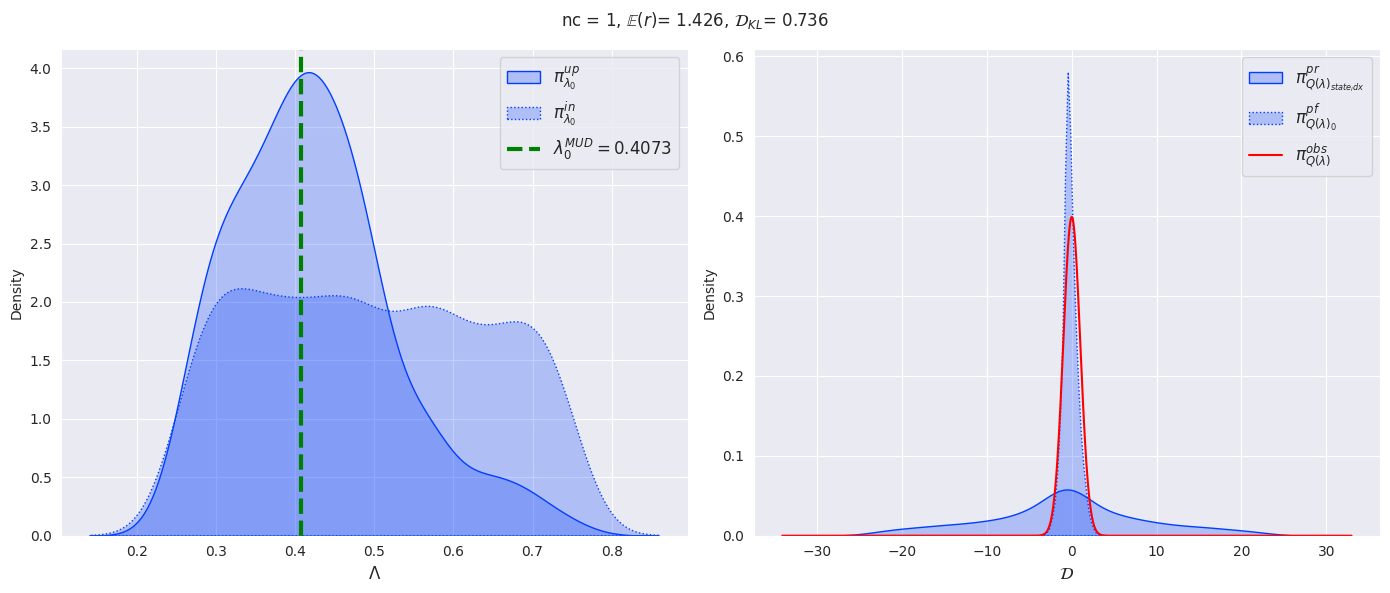

In [92]:
pca_prob.density_plots(lam_kwargs={"param_idx": 0})

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

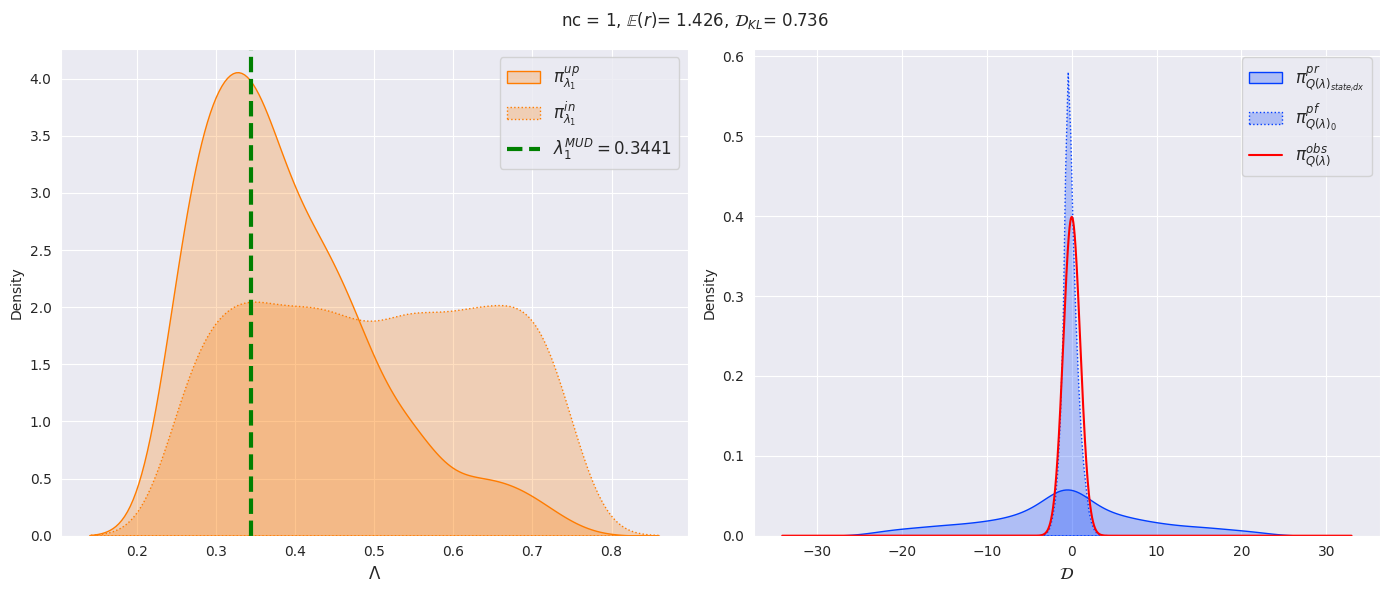

In [93]:
pca_prob.density_plots(lam_kwargs={"param_idx": 1})

<Axes: xlabel='q_pca_0', ylabel='q_pca_1'>

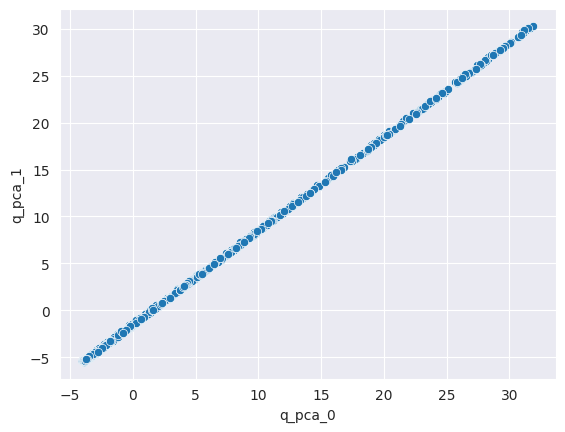

In [60]:
import seaborn as sns

sns.scatterplot(data=pca_prob.state, x="q_pca_0", y="q_pca_1")